In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
tf.test.gpu_device_name("haha nice try to add a stgring inside the brakcet making it look like a parameter but superprise surprise! there is no paramter in this function whose name is i forgot as the screen scrollerd and i couldnt see what the name is and i forgot the name as wel lmao thi si who i am")

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8960890141743625272, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15693578240
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12864928587012400759
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!cat /proc/meminfo

MemTotal:       26751732 kB
MemFree:        22531700 kB
MemAvailable:   25202172 kB
Buffers:           89156 kB
Cached:          2689340 kB
SwapCached:            0 kB
Active:          1186092 kB
Inactive:        2530600 kB
Active(anon):     784740 kB
Inactive(anon):     8564 kB
Active(file):     401352 kB
Inactive(file):  2522036 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:                24 kB
Writeback:             0 kB
AnonPages:        938216 kB
Mapped:           584072 kB
Shmem:              9240 kB
Slab:             205476 kB
SReclaimable:     139596 kB
SUnreclaim:        65880 kB
KernelStack:        4832 kB
PageTables:         8580 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375864 kB
Committed_AS:    4014048 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             2080 kB
AnonHugePages:   

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Loading packages")
!pip install SimpleITK
!pip install PyWavelets
import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
#import cv2
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization, concatenate, Activation, Add, ZeroPadding2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Lambda
from tensorflow.keras.optimizers import SGD,Adam
#from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
import SimpleITK as sitk
import numpy as np
import scipy.misc
import numpy.random as rng
import pywt
#from PIL import Image, ImageDraw, ImageFont
#from sklearn.utils import shuffle
#import nibabel as nib #reading MR images
#from sklearn.cross_validation import train_test_split
#import math
import glob
from skimage.filters.rank import entropy
from skimage.morphology import disk,rectangle
from sklearn.preprocessing import MinMaxScaler
from skimage.measure import perimeter
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from skimage.feature import canny
from skimage.feature import greycomatrix, greycoprops
print("Done")

Mounted at /content/drive
Loading packages
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 195 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tf.test.gpu_device_name()
from tqdm import tqdm

In [ ]:
start_time = time.time()
def tumor(X,label):
  #only enhancing
  if label == 4:
    X[X != 4] = 0
    X[X == 4] = 1
    #necrotic
  if label == 6:
    X[X != 1] = 0
    #only edema
  if label == 2:
    X[X != 2] = 0
    X[X == 2] = 1
  #tumor core
  if label == 1:
    X[X == 2] = 0
    X[X != 0] = 1
  #complete tumor
  if label == 5:
    X[X != 0] = 1
  #All tumor
  #if label == 3:
   # X[X == 3] = 1
  return X
end_time = time.time()
t=end_time-start_time
print(t)


0.0002663135528564453


In [ ]:
label_value=5
image_loc = "drive/My Drive/t2/"
image_location = image_loc
mask_location = "drive/My Drive/seg/"

In [ ]:
#_______Fiding non-zero mask index____________
    #print("Finding white slices...")
image_location = image_loc
mask_location = "drive/My Drive/seg/"
sorted_image_list = sorted(os.listdir(image_location))
sorted_mask_list = sorted(os.listdir(mask_location))
non_zero_index=[]

for i in tqdm(range(210)):
    #print("i "+str(i))
    #globber_image = glob.glob(image_location + sorted_image_list[i])
    globber_mask = glob.glob(mask_location + sorted_mask_list[i])
    #images = sisitktk.ReadImage(globber_image[0])
    masks = sitk.ReadImage(globber_mask[0])
    masks = sitk.GetArrayFromImage(masks)
    #images = sitk.GetArrayFromImage(images)
    #masks=to_categorical(masks,num_classes=5)
    masks=tumor(masks,label_value)
    #if label_num == 4:
      #masks[masks != 4] = 0
      #masks[masks == 4] = 1
    #masks=masks[:,:,:,4]
    start=-1
    #print("Calculating image "+str(i))
    for j in range(155):
      if(np.max(masks[j])==1):
          #print("found")
          #print(j)
          start=j
          break
    for j in range(155):
        if(np.max(masks[154-j])==1):
          non_zero_index.append((start,154-j))
          #print(154-j)
          break
    del masks
print("Finished.")

100%|██████████| 210/210 [00:13<00:00, 15.09it/s]

Finished.


In [ ]:
print("Loading Training images...")
image=[]
mask=[]
sorted_image_list = sorted(os.listdir(image_location))
sorted_mask_list = sorted(os.listdir(mask_location))
for i in range(20):
  globber_image = glob.glob(image_location + sorted_image_list[i])
  globber_mask = glob.glob(mask_location + sorted_mask_list[i])
  images = sitk.ReadImage(globber_image[0])
  masks = sitk.ReadImage(globber_mask[0])
  masks = sitk.GetArrayFromImage(masks)
  images = sitk.GetArrayFromImage(images)
  masks=tumor(masks,label_value)
  #if label_num == 4:
         # masks[masks != 4] = 0
          #masks[masks == 4] = 1
  #masks=to_categorical(masks,num_classes=5)
  masks=masks[:,24:216,24:216]
  images=images[:,24:216,24:216]
  for j in range(non_zero_index[i][0],non_zero_index[i][1]+1):
    #masks=masks[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216,4].reshape(-1,192,192,1)
    #images=images[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216].reshape(-1,192,192,1)
    #if(np.sum(masks[j])>=400):
    image.append(np.array(images[j]).reshape(-1,192,192))
    mask.append(np.array(masks[j]).reshape(-1,192,192))
  print("Image "+str(i)+" loaded.")
  del images
  del masks
print("Training images loaded.")
print("Converting NumPy Array")
image = np.array(image).reshape(-1,192,192,1)
mask=np.array(mask).reshape(-1,192,192,1)
print("Done")

# print("Loading Test Images...")
# test_image=[]
# test_mask=[]
# sorted_image_list = sorted(os.listdir(image_location))
# sorted_mask_list = sorted(os.listdir(mask_location))

# for i in range(171,210):
#   globber_image = glob.glob(image_location + sorted_image_list[i])
#   globber_mask = glob.glob(mask_location + sorted_mask_list[i])
#   images = sitk.ReadImage(globber_image[0])
#   masks = sitk.ReadImage(globber_mask[0])
#   masks = sitk.GetArrayFromImage(masks)
#   images = sitk.GetArrayFromImage(images)
#   masks=tumor(masks,label_value)
#   #if label_num == 4:
#           #masks[masks != 4] = 0
#           #masks[masks == 4] = 1
#   #masks=to_categorical(masks,num_classes=5)
#   masks=masks[:,24:216,24:216]
#   images=images[:,24:216,24:216]
#   for j in range(non_zero_index[i][0],non_zero_index[i][1]+1):
#     #masks=masks[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216,4].reshape(-1,192,192,1)
#     #images=images[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216].reshape(-1,192,192,1)
#     #if(np.sum(masks[j])>=400):
#     test_image.append(np.array(images[j]).reshape(-1,192,192))
#     test_mask.append(np.array(masks[j]).reshape(-1,192,192))
#   print("Image "+str(i)+" loaded.")
#   del images
#   del masks
# print("Test Images loaded")
# print("Converting NumPy Array")
# test_image = np.array(test_image).reshape(-1,192,192,1)
# test_mask=np.array(test_mask).reshape(-1,192,192,1)
# print("Done")

Loading Training images...
Image 0 loaded.
Image 1 loaded.
Image 2 loaded.
Image 3 loaded.
Image 4 loaded.
Image 5 loaded.
Image 6 loaded.
Image 7 loaded.
Image 8 loaded.
Image 9 loaded.
Image 10 loaded.
Image 11 loaded.
Image 12 loaded.
Image 13 loaded.
Image 14 loaded.
Image 15 loaded.
Image 16 loaded.
Image 17 loaded.
Image 18 loaded.
Image 19 loaded.
Training images loaded.
Converting NumPy Array
Done


In [ ]:
print("Training image shape: "+str(image.shape))
x=image.shape[0]
print("Training mask shape: "+str(mask.shape))
y=mask.shape[0]

Training image shape: (1368, 192, 192, 1)
Training mask shape: (1368, 192, 192, 1)


In [ ]:

train_image,valid_image,train_mask,valid_mask=train_test_split(image,mask,test_size=0.2,shuffle=True,random_state=1)
print("Training image shape: "+str(train_image.shape))
print("Training mask shape: "+str(train_mask.shape))
# print("Validation image shape: "+str(valid_image.shape))
# print("Validation mask shape: "+str(valid_mask.shape))
# print("Test image shape: "+str(test_image.shape))
# print("Test mask shape: "+str(test_mask.shape))
train_shape=train_image.shape[0]
# valid_shape=valid_image.shape[0]
# test_shape=test_image.shape[0]

Training image shape: (1094, 192, 192, 1)
Training mask shape: (1094, 192, 192, 1)


"len=90\nfor i in range(len):\n  plt.figure(figsize=[20,20])\n  curr_img = np.reshape(mask[i], (192,192))\n  plt.subplot(10,10,i+1)\n  plt.imshow(curr_img, cmap='gray')"

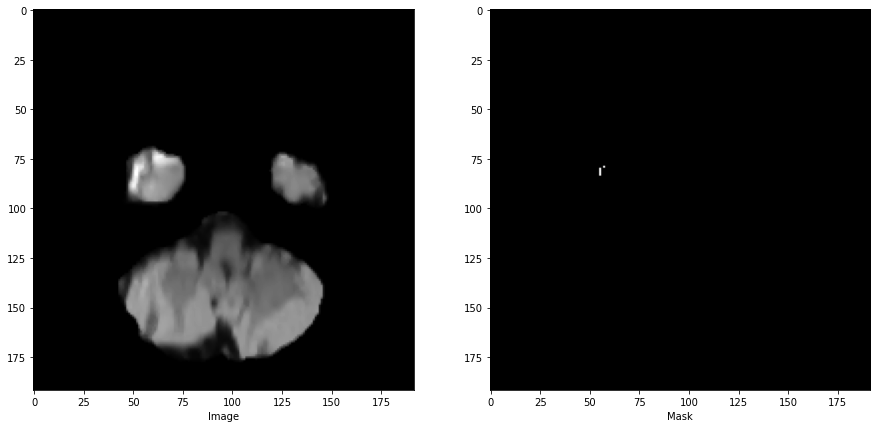

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(121)
curr_img = np.reshape(image[0], (192,192))
plt.imshow(curr_img, cmap='gray')
plt.xlabel("Image")
# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(mask[0], (192,192))
plt.imshow(curr_img, cmap='gray')
plt.xlabel("Mask")
"""len=90
for i in range(len):
  plt.figure(figsize=[20,20])
  curr_img = np.reshape(mask[i], (192,192))
  plt.subplot(10,10,i+1)
  plt.imshow(curr_img, cmap='gray')"""


Text(0.5, 0, 'Necrotic')

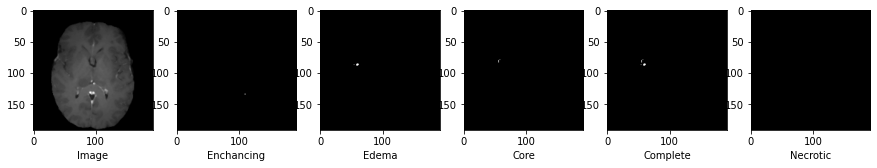

In [ ]:
def get_one_image(i,tumor_value):
  test_image=[]
  test_mask=[]
  sorted_image_list = sorted(os.listdir(image_location))
  sorted_mask_list = sorted(os.listdir(mask_location))
  globber_image = glob.glob(image_location + sorted_image_list[i])
  globber_mask = glob.glob(mask_location + sorted_mask_list[i])
  images = sitk.ReadImage(globber_image[0])
  masks = sitk.ReadImage(globber_mask[0])
  masks = sitk.GetArrayFromImage(masks)
  images = sitk.GetArrayFromImage(images)
  masks=tumor(masks,tumor_value)
  #if label_num == 4:
          #masks[masks != 4] = 0
          #masks[masks == 4] = 1
  #masks=to_categorical(masks,num_classes=5)
  masks=masks[:,24:216,24:216]
  images=images[:,24:216,24:216]
  for j in range(non_zero_index[i][0],non_zero_index[i][1]+1):
    #masks=masks[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216,4].reshape(-1,192,192,1)
    #images=images[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216].reshape(-1,192,192,1)
    #if(np.sum(masks[j])>=400):
      test_image.append(np.array(images[j]).reshape(-1,192,192))
      test_mask.append(np.array(masks[j]).reshape(-1,192,192))
  return np.array(test_image).reshape(-1,192,192,1),np.array(test_mask).reshape(-1,192,192,1)
img,msk=get_one_image(15,4)
plt.figure(figsize=[15,15])
plt.subplot(161)
curr_img = np.reshape(img[0], (192,192))
plt.imshow(curr_img, cmap='gray')
plt.xlabel("Image")
# Display the first image in testing data
plt.subplot(162)
curr_img = np.reshape(msk[0], (192,192))
plt.imshow(curr_img, cmap='gray')
plt.xlabel("Enchancing")
img,msk=get_one_image(0,2)
plt.subplot(163)
curr_img = np.reshape(msk[0], (192,192))
plt.imshow(curr_img, cmap='gray')
plt.xlabel("Edema")
img,msk=get_one_image(0,1)
plt.subplot(164)
curr_img = np.reshape(msk[0], (192,192))
plt.imshow(curr_img, cmap='gray')
plt.xlabel("Core")
img,msk=get_one_image(0,5)
plt.subplot(165)
curr_img = np.reshape(msk[0], (192,192))
plt.imshow(curr_img, cmap='gray')
plt.xlabel("Complete")
img,msk=get_one_image(0,6)
plt.subplot(166)
curr_img = np.reshape(msk[0], (192,192))
plt.imshow(curr_img, cmap='gray')
plt.xlabel("Necrotic")

In [ ]:
data_gen_args = dict(#featurewise_center=True,
                     #featurewise_std_normalization=True,
                     rotation_range=90,
                     horizontal_flip=True,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2
                     )
seed=1
batch_size=8
train = ImageDataGenerator(**data_gen_args)
train_X = train.flow(train_image,batch_size=batch_size,seed=seed)
train_Y = train.flow(train_mask,batch_size=batch_size,seed=seed)
# valid = ImageDataGenerator()
# valid_X = valid.flow(valid_image,batch_size=batch_size,seed=seed)
# valid_Y = valid.flow(valid_mask,batch_size=batch_size,seed=seed)
def train_gen(train_X,train_Y):
  traingen = zip(train_X,train_Y)
  for (i,j) in traingen:
    yield i,j
# def valid_gen(valid_X,valid_Y):
#   validgen = zip(valid_X,valid_Y)
#   for (i,j) in validgen:
#     yield i,j
train_generator=train_gen(train_X,train_Y)
# valid_generator=valid_gen(valid_X,valid_Y)

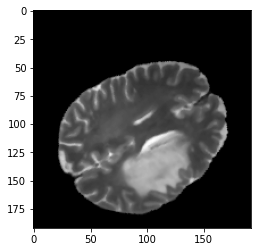

In [ ]:
x,y=next(train_generator)
plt.imshow(x[4].reshape(192,192),cmap="gray")

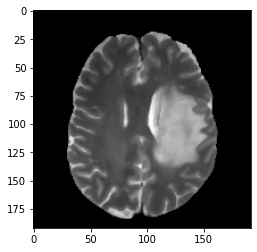

In [ ]:
plt.imshow(x[4].reshape(192,192),cmap="gray")

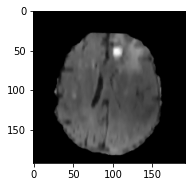

In [ ]:
def conv_layer(input_tensor,filters,kernel_size=3):
  x = Conv2D(filters,(kernel_size,kernel_size), activation="relu", kernel_initializer='he_normal', padding='same')(input_tensor)
  x = BatchNormalization()(x)
  x = Conv2D(filters,(kernel_size,kernel_size), activation="relu", kernel_initializer='he_normal', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(filters,(kernel_size,kernel_size), activation="relu", kernel_initializer='he_normal', padding='same')(x)
  x = BatchNormalization()(x)
  return x
def mixed_pool(x,a=0.5):
  max_tensor = K.pool2d(x,pool_size=(2,2),strides=(2,2),padding='valid',pool_mode='max')
  avg_tensor = K.pool2d(x,pool_size=(2,2),strides=(2,2),padding='valid',pool_mode='avg')
  #a=K.variable(value=0.5)
  final = a*max_tensor + (1-a)*avg_tensor
  return final
def mixed_pool2d_output_shape(input_shape):
    shape = list(input_shape)
    if K.image_dim_ordering() == 'th':
        shape[2] /= 2
        shape[3] /= 2
    else:
        shape[1] /= 2
        shape[2] /= 2
    return tuple(shape)
def Light_Unet_plusplus_with_mixed_pool():
  filter_array=[32,64,128,256,512]
  inputs = Input((192,192,1))

  c00 = conv_layer(inputs,filter_array[0])
  pool0 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c00)

  c10 = conv_layer(pool0,filter_array[1])
  pool1 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c10)

  c20 = conv_layer(pool1,filter_array[2])
  pool2 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c20)

  c30 = conv_layer(pool2,filter_array[3])
  pool3 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c30)

  c40 = conv_layer(pool3,filter_array[4])
  pool4 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c40)

  up01 = Conv2DTranspose(filter_array[0],(3,3),strides=(2,2),padding="same")(c10)
  c01 = concatenate([up01,c00])
  c01 = conv_layer(c01,filter_array[0])

  up11 = Conv2DTranspose(filter_array[1],(3,3),strides=(2,2),padding="same")(c20)
  c11 = concatenate([up11,c10])
  c11 = conv_layer(c11,filter_array[1])

  up21 = Conv2DTranspose(filter_array[2],(3,3),strides=(2,2),padding="same")(c30)
  c21 = concatenate([up21,c20])
  c21 = conv_layer(c21,filter_array[2])

  up31 = Conv2DTranspose(filter_array[3],(3,3),strides=(2,2),padding="same")(c40)
  c31 = concatenate([up31,c30])
  c31 = conv_layer(c31,filter_array[3])

  up02 = Conv2DTranspose(filter_array[0],(3,3),strides=(2,2),padding="same")(c11)
  c02 = concatenate([up02,c01,c00])
  c02 = conv_layer(c02,filter_array[0])

  up12 = Conv2DTranspose(filter_array[1],(3,3),strides=(2,2),padding="same")(c21)
  c12 = concatenate([up12,c11,c10])
  c12 = conv_layer(c12,filter_array[1])

  up22 = Conv2DTranspose(filter_array[2],(3,3),strides=(2,2),padding="same")(c31)
  c22 = concatenate([up22,c21,c20])
  c22 = conv_layer(c22,filter_array[2])

  up03 = Conv2DTranspose(filter_array[0],(3,3),strides=(2,2),padding="same")(c12)
  c03 = concatenate([up03,c02,c01,c00])
  c03 = conv_layer(c03,filter_array[0])

  up13 = Conv2DTranspose(filter_array[1],(3,3),strides=(2,2),padding="same")(c22)
  c13 = concatenate([up13,c12,c11,c10])
  c13 = conv_layer(c13,filter_array[1])

  up04 = Conv2DTranspose(filter_array[0],(3,3),strides=(2,2),padding="same")(c13)
  c04 = concatenate([up04,c03,c02,c01,c00])
  c04 = conv_layer(c04,filter_array[0])

  outputs = Conv2D(1, (1, 1), activation='sigmoid') (c04)

  model = Model(inputs=[inputs], outputs=[outputs])

  return model

In [ ]:
def conv_layer(input_tensor,filters,kernel_size=3):
  x = Conv2D(filters,(kernel_size,kernel_size), activation="relu", kernel_initializer='he_normal', padding='same')(input_tensor)
  x = BatchNormalization()(x)
  x = Conv2D(filters,(kernel_size,kernel_size), activation="relu", kernel_initializer='he_normal', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(filters,(kernel_size,kernel_size), activation="relu", kernel_initializer='he_normal', padding='same')(x)
  x = BatchNormalization()(x)
  return x
def mixed_pool(x,a=0.5):
  max_tensor = K.pool2d(x,pool_size=(2,2),strides=(2,2),padding='valid',pool_mode='max')
  avg_tensor = K.pool2d(x,pool_size=(2,2),strides=(2,2),padding='valid',pool_mode='avg')
  #a=K.variable(value=0.5)
  final = a*max_tensor + (1-a)*avg_tensor
  return final
def mixed_pool2d_output_shape(input_shape):
    shape = list(input_shape)
    if K.image_dim_ordering() == 'th':
        shape[2] /= 2
        shape[3] /= 2
    else:
        shape[1] /= 2
        shape[2] /= 2
    return tuple(shape)
def Unet_plusplus_with_mixed_pool():
  filter_array=[32,64,128,256,512]
  inputs = Input((192,192,1))

  c00 = conv_layer(inputs,filter_array[0])
  pool0 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c00)

  c10 = conv_layer(pool0,filter_array[1])
  pool1 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c10)

  c20 = conv_layer(pool1,filter_array[2])
  pool2 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c20)

  c30 = conv_layer(pool2,filter_array[3])
  pool3 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c30)

  c40 = conv_layer(pool3,filter_array[4])
  pool4 = Lambda(mixed_pool,mixed_pool2d_output_shape)(c40)

  up01 = Conv2DTranspose(filter_array[0],(3,3),strides=(2,2),padding="same")(c10)
  c01 = concatenate([up01,c00])
  c01 = conv_layer(c01,filter_array[0])

  up11 = Conv2DTranspose(filter_array[1],(3,3),strides=(2,2),padding="same")(c20)
  c11 = concatenate([up11,c10])
  c11 = conv_layer(c11,filter_array[1])

  up21 = Conv2DTranspose(filter_array[2],(3,3),strides=(2,2),padding="same")(c30)
  c21 = concatenate([up21,c20])
  c21 = conv_layer(c21,filter_array[2])

  up31 = Conv2DTranspose(filter_array[3],(3,3),strides=(2,2),padding="same")(c40)
  c31 = concatenate([up31,c30])
  c31 = conv_layer(c31,filter_array[3])

  up02 = Conv2DTranspose(filter_array[0],(3,3),strides=(2,2),padding="same")(c11)
  c02 = concatenate([up02,c01,c00])
  c02 = conv_layer(c02,filter_array[0])

  up12 = Conv2DTranspose(filter_array[1],(3,3),strides=(2,2),padding="same")(c21)
  c12 = concatenate([up12,c11,c10])
  c12 = conv_layer(c12,filter_array[1])

  up22 = Conv2DTranspose(filter_array[2],(3,3),strides=(2,2),padding="same")(c31)
  c22 = concatenate([up22,c21,c20])
  c22 = conv_layer(c22,filter_array[2])

  up03 = Conv2DTranspose(filter_array[0],(3,3),strides=(2,2),padding="same")(c12)
  c03 = concatenate([up03,c02,c01,c00])
  c03 = conv_layer(c03,filter_array[0])

  up13 = Conv2DTranspose(filter_array[1],(3,3),strides=(2,2),padding="same")(c22)
  c13 = concatenate([up13,c12,c11,c10])
  c13 = conv_layer(c13,filter_array[1])

  up04 = Conv2DTranspose(filter_array[0],(3,3),strides=(2,2),padding="same")(c13)
  c04 = concatenate([up04,c03,c02,c01,c00])
  c04 = conv_layer(c04,filter_array[0])

  outputs = Conv2D(1, (1, 1), activation='sigmoid') (c04)

  model = Model(inputs=[inputs], outputs=[outputs])

  return model

In [ ]:
from tensorflow.keras.callbacks import CSVLogger
label=label_value
stringval=image_loc.split('/')[-2]
model_name = 'unet++_mixedpool_'
  #only enhancing
if label == 4:
  csv_logger = CSVLogger(model_name+stringval+'_enhancingtrain.log', separator=',', append=False)
  model_checkpoint = ModelCheckpoint(model_name+stringval+'_ENHANCING.h5', monitor='val_dice_score',mode='max',verbose=1, save_best_only=True)
  #necrotic
if label == 6:
  csv_logger = CSVLogger(model_name+stringval+'_necrotictraining.log', separator=',', append=False)
  model_checkpoint = ModelCheckpoint(model_name+stringval+'_NECROTIC.h5', monitor='val_dice_score',mode='max',verbose=1, save_best_only=True)
    #only edema
if label == 2:
  csv_logger = CSVLogger(model_name+stringval+'_edematraining.log', separator=',', append=False)
  model_checkpoint = ModelCheckpoint(model_name+stringval+'_EDEMA.h5', monitor='val_dice_score',mode='max',verbose=1, save_best_only=True)
  #tumor core
if label == 1:
  csv_logger = CSVLogger(model_name+stringval+'_coretraining.log', separator=',', append=False)
  model_checkpoint = ModelCheckpoint(model_name+stringval+'_CORE.h5', monitor='val_dice_score',mode='max',verbose=1, save_best_only=True)
  #complete tumor
if label == 5:
  csv_logger = CSVLogger(model_name+stringval+'_completetraining.log', separator=',', append=False)
  model_checkpoint = ModelCheckpoint(model_name+stringval+'_COMPLETE.h5', monitor='val_dice_score',mode='max',verbose=1, save_best_only=True)

#csv_logger = CSVLogger('training.log', separator=',', append=False)
#model.fit(X_train, Y_train, callbacks=[csv_logger])

def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score

def bce_dice_loss(y_true, y_pred):
    return 0.8*binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
import tensorflow as tf
def calculate_iou(y_true, y_pred,smooth=1):

  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou


def IoU(y_true, y_pred):

    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou
def dice_score(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score
from sklearn.metrics import jaccard_score
def J_score(y_true, y_pred):
    jscore=jaccard_score(y_true, y_pred, average='macro')
    return jscore

earlystopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    restore_best_weights=True)

reducelr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1,
    min_delta=0.000001 )


NameError: ignored

In [ ]:
model = Unet_plusplus_with_mixed_pool()
model.compile(loss=bce_dice_loss,optimizer=Adam(learning_rate=0.0001),metrics=[dice_score,'accuracy',IoU])
model.summary()

In [ ]:
start_time = time.time()
history=model.fit_generator(train_generator,steps_per_epoch=(train_shape/batch_size),epochs=100,validation_data=valid_generator,validation_steps=(valid_shape/batch_size),callbacks=[model_checkpoint,csv_logger,reducelr])
end_time = time.time()
t=end_time-start_time
print('execution time is:')
print(t)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1152/1151 [==============================] - ETA: 0s - loss: 1.0177 - dice_score: 0.2518 - accuracy: 0.9529 - IoU: 0.1345
Epoch 00001: val_dice_score improved from -inf to 0.42859, saving model to unet++_mixedpool_t2_COMPLETE.h5
1152/1151 [==============================] - 254s 221ms/step - loss: 1.0177 - dice_score: 0.2518 - accuracy: 0.9529 - IoU: 0.1345 - val_loss: 0.6751 - val_dice_score: 0.4286 - val_accuracy: 0.9851 - val_IoU: 0.2388 - lr: 1.0000e-04
Epoch 2/100
1152/1151 [==============================] - ETA: 0s - loss: 0.4930 - dice_score: 0.5956 - accuracy: 0.9811 - IoU: 0.3542
Epoch 00002: val_dice_score improved from 0.42859 to 0.73950, saving model to unet++_mixedpool_t2_COMPLETE.h5
1152/1151 [==============================] - 251s 218ms/step - loss: 0.4930 - dice_score: 0.5956 - accuracy: 0.9811 - IoU: 0.3542 - val_loss: 0.3408 - val_dice_score: 0.7395 - val_accuracy: 0.9866 - val_IoU:

In [ ]:
import pandas as pd
df = pd.read_csv('drive/My Drive/weight/flair-complete.log', sep=',', engine='python')
df.head()

FileNotFoundError: ignored

In [ ]:
#plotting the graph
ax = plt.gca()
df.plot(kind='line',x='epoch',y='acc',ax=ax)
df.plot(kind='line',x='epoch',y='val_acc', color='red', ax=ax)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#import plotly.express as px
#fig = px.line(df, x = 'epoch', y = 'acc', title='Accuaracy')
#fig = px.line(df, x = 'epoch', y = 'val_acc', title='Accuaracy')
#fig.show()


In [ ]:
model.load_weights('drive/My Drive/unet++_mixedpool_t1ce_ENHANCING.h5')
slicer=10
pred=model.predict(test_image)
plt.figure(figsize=[10,10])
plt.subplot(131)
plt.imshow(test_image[slicer].reshape(192,192))
plt.subplot(132)
plt.imshow(test_mask[slicer].reshape(192,192))
plt.subplot(133)
plt.imshow(pred[slicer].reshape(192,192))

NameError: ignored

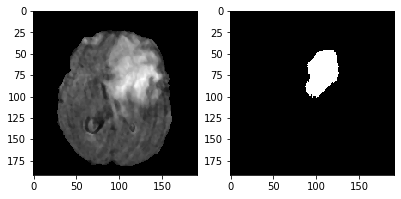

In [ ]:
plt.figure(figsize=[10,10])
#prediction_masks_test=prediction_masks.copy()
#prediction_masks_test[prediction_masks>0.5]=1
#prediction_masks_test[prediction_masks<0.5]=0
# Display the first image in training data
#plt.subplot(131)
#curr_img = np.reshape(images_test[90], (240,240))
#plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(131)
curr_img = np.reshape(train_image[111], (192,192))
plt.imshow(curr_img, cmap='gray')

plt.subplot(132)
curr_img = np.reshape(train_mask[111], (192,192))
plt.imshow(curr_img, cmap='gray')






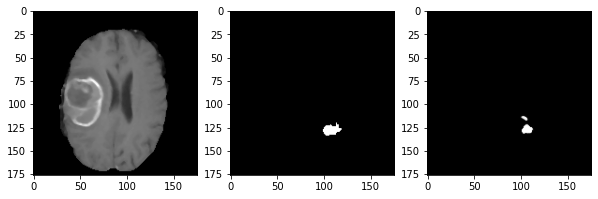

In [ ]:
plt.figure(figsize=[10,10])
plt.subplot(131)
curr_img = np.reshape(test_image[870], (192,192))
plt.imshow(curr_img, cmap='gray')

plt.subplot(132)
curr_img = np.reshape(test_mask[2], (192,192))
plt.imshow(curr_img, cmap='gray')

plt.subplot(133)
curr_img = np.reshape(prediction_masks[2], (192,192))
plt.imshow(curr_img, cmap='gray')





In [ ]:
print(history.history.keys())
print(history.history['loss'])
print(history.history['IoU'])
print(history.history['acc'])
print(history.history['dice_score'])
print(history.history['val_loss'])
print(history.history['val_IoU'])
print(history.history['val_acc'])
print(history.history['val_dice_score'])
print(history.history['lr'])

dict_keys(['loss', 'IoU', 'acc', 'dice_score', 'val_loss', 'val_IoU', 'val_acc', 'val_dice_score', 'lr'])
[0.6810002936053946, 0.4043829455669996, 0.3853994706812285, 0.38161687516916976, 0.35366663254996983, 0.34138146235536393, 0.3348952104926966, 0.3337705792125575, 0.32641428072494594, 0.31874342401926226, 0.31530690792726584, 0.3070223795129613, 0.30932975056746054, 0.2962284493804523, 0.29645100263191315, 0.29002786354252436, 0.29311772460722596, 0.2898442677078023, 0.2893937988891701, 0.2912808713143671, 0.27908153461133006, 0.28112326259709586, 0.27304672334491625, 0.2697564173102924, 0.27086646011029875, 0.27198728385663046, 0.2674510385342317, 0.26473163492651564, 0.2612618238687671, 0.2612554659491501, 0.261299833022715, 0.264490497299147, 0.25666089998320923, 0.2592674058531718, 0.2540531320501043, 0.25583140105301067, 0.2501492089963598, 0.24995327110698534, 0.2535868003078725, 0.25057568163127386, 0.24913174801601606, 0.24687270387997431, 0.24664236197356382, 0.2401785224

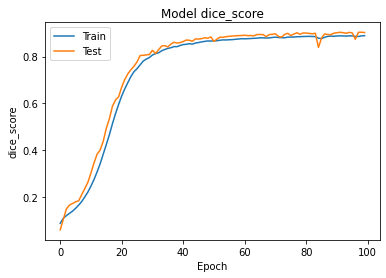

In [ ]:
plt.plot(history.history['dice_score'])
plt.plot(history.history['val_dice_score'])
plt.title('Model dice_score')
plt.ylabel('dice_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#print(history.history.keys())
#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
print(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#plt.savefig('drive/My Drive/Model loss.png')

plt.plot(history.history['dice_score'])
plt.plot(history.history['val_dice_score'])
plt.title('Model dice_score')
plt.ylabel('dice_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['IoU'])
plt.plot(history.history['val_IoU'])
plt.title('Model IoU')
plt.ylabel('dice_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: ignored

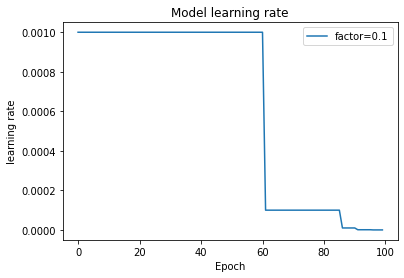

In [ ]:
plt.plot(history.history['lr'])
#plt.plot(history.history['val_lr'])
plt.title('Model learning rate')
plt.ylabel('learning rate')
plt.xlabel('Epoch')
plt.legend(['factor=0.1'], loc='upper right')
plt.show()


In [ ]:
model1= Unet_plusplus_with_mixed_pool()
model1.load_weights('drive/My Drive/unet++_mixedpool_t1ce_ENHANCING.h5')
prediction_masks = model1.predict(test_image)
#prediction_masks[prediction_masks>0.5]=1
#prediction_masks[pred"iction_masks<0.5]=0
#prediction_masks.shape
prediction_masks.shape

(1863, 192, 192, 1)

In [ ]:
prediction_masks_test=prediction_masks.copy()
prediction_masks_test[prediction_masks_test>0.5]=1
prediction_masks_test[prediction_masks_test<0.5]=0

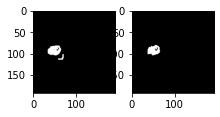

In [ ]:

plt.figure(figsize=[5,5])
prediction_masks_test=prediction_masks.copy()
prediction_masks_test[prediction_masks>0.5]=1
prediction_masks_test[prediction_masks<0.5]=0
# Display the first image in training data
#plt.subplot(131)
#curr_img = np.reshape(images_test[90], (240,240))
#plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(132)
curr_img = np.reshape(test_mask[100], (192,192))
plt.imshow(curr_img, cmap='gray')

plt.subplot(133)
curr_img = np.reshape(prediction_masks_test[100], (192,192))
plt.imshow(curr_img, cmap='gray')



In [ ]:
from sklearn.metrics import mean_squared_error , f1_score
mse=mean_squared_error(test_mask.reshape(-1),prediction_masks_test.reshape(-1))
print(mse)
from sklearn.metrics import confusion_matrix
#results = confusion_matrix(test_mask.reshape(-1),prediction_masks_test.reshape(-1))
results=f1_score(test_mask.reshape(-1),prediction_masks_test.reshape(-1),average='macro')
print(results)

0.0051623504
0.9232003452793278


In [ ]:
sensitivity1 = results[0,0]/(results[0,0]+results[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = results[1,1]/(results[1,0]+results[1,1])
print('Specificity : ', specificity1)

accuracy = (results[1,1]+results[0,0])/(results[1,1]+results[1,0]+results[0,1]+results[0,0])
print("Accuracy: ",accuracy)

Sensitivity :  0.9962678357619908
Specificity :  0.8360942272218694
Accuracy:  0.9886075869080297


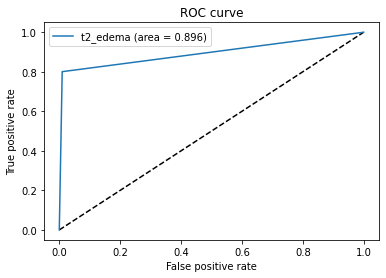

In [ ]:
#Plotting ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
y_pred = model.predict(test_image).ravel()
y_pred [y_pred >0.5]=1
y_pred [y_pred <0.5]=0
#y_prob=.model.predict_proba(test_image)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_mask.reshape(-1), y_pred.reshape(-1))
#fpr , tpr , thresholds = roc_curve ( test_mask , y_val_cat_prob)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='t2_edema (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(prediction_masks_test.reshape(-1),test_mask.reshape(-1)))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99  73837794
         1.0       0.80      0.84      0.82   4350750

    accuracy                           0.98  78188544
   macro avg       0.90      0.91      0.90  78188544
weighted avg       0.98      0.98      0.98  78188544



In [ ]:
from sklearn.metrics import f1_score
score = f1_score(test_mask.reshape(-1), prediction_masks_test.reshape(-1),average='macro')
# print
print(score)

0.93466944912473


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(test_mask.reshape(-1), prediction_masks_test.reshape(-1),pos_label=1, average='binary')


# Volume Calculation

In [ ]:
label_value=4
image_location = "drive/My Drive/t1ce/"
mask_location = "drive/My Drive/seg/"

In [ ]:
df = pd.read_csv('drive/My Drive/survival_data-2017.csv')

In [ ]:
print(df.columns)
print(df['Brats17ID'].values[0]+'_'+image_location.split('/')[-2]+'.nii.gz')

Index(['Brats17ID', 'Age', 'Survival'], dtype='object')
Brats17_TCIA_167_1_t1ce.nii.gz


In [ ]:
survival_list = df['Brats17ID'].values.copy()

In [ ]:
survival_list[1]

'Brats17_TCIA_242_1'

In [ ]:
#_______Fiding non-zero mask index____________
    print("Finding white slices...")
    image_location = image_loc
    mask_location = "drive/My Drive/seg/"
    sorted_image_list = sorted(os.listdir(image_location))
    sorted_mask_list = sorted(os.listdir(mask_location))
    non_zero_index=[]

    for i in range(210):
        #print("i "+str(i))
        #globber_image = glob.glob(image_location + sorted_image_list[i])
        globber_mask = glob.glob(mask_location + sorted_mask_list[i])
        #images = sisitktk.ReadImage(globber_image[0])
        masks = sitk.ReadImage(globber_mask[0])
        masks = sitk.GetArrayFromImage(masks)
        #images = sitk.GetArrayFromImage(images)
        #masks=to_categorical(masks,num_classes=5)
        masks=tumor(masks,label_value)
        #if label_num == 4:
          #masks[masks != 4] = 0
          #masks[masks == 4] = 1
        #masks=masks[:,:,:,4]
        start=-1
        print("Calculating image "+str(i))
        for j in range(155):
          if(np.max(masks[j])==1):
              #print("found")
              #print(j)
              start=j
              break
        for j in range(155):
            if(np.max(masks[154-j])==1):
              non_zero_index.append((start,154-j))
              #print(154-j)
              break
        del masks
    print("Finished.")

In [ ]:
df = pd.read_csv('drive/My Drive/survival_data-2017.csv')
label_value=6
saving_location='Necrotic_t1ce_stats_withsurvival.csv'
survival_list = df['Brats17ID'].values.copy()
model1= Unet_plusplus_with_mixed_pool()
model1.load_weights('drive/My Drive/unet++_mixedpool_t1ce_NECROTIC.h5')
tumor_volume=[]
tumor_actual_volume=[]
survival_name=[]
modality = image_location.split('/')[-2]
for i in range(0,163):
  image=[]
  mask=[]
  print("Finding volume of patient "+str(i))
  image_list_val = survival_list[i]+'_'+modality+'.nii.gz'
  mask_list_val = survival_list[i]+'_seg.nii.gz'
  globber_image = glob.glob(image_location + image_list_val)
  globber_mask = glob.glob(mask_location + mask_list_val)
  images = sitk.ReadImage(globber_image[0])
  masks = sitk.ReadImage(globber_mask[0])
  masks = sitk.GetArrayFromImage(masks)
  images = sitk.GetArrayFromImage(images)
  masks=tumor(masks,label_value)
  start=-1
  print("Calculating image "+str(i))
  for j in range(155):
    if(np.max(masks[j])==1):
      start=j
      break
  for j in range(155):
    if(np.max(masks[154-j])==1):
        break
  #if label_num == 4:
         # masks[masks != 4] = 0
          #masks[masks == 4] = 1
  #masks=to_categorical(masks,num_classes=5)
  masks=masks[:,24:216,24:216]
  images=images[:,24:216,24:216]
  for j in range(start,155-j):
    #masks=masks[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216,4].reshape(-1,192,192,1)
    #images=images[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216].reshape(-1,192,192,1)
    #if(np.sum(masks[j])>=400):
    image.append(np.array(images[j]).reshape(-1,192,192))
    mask.append(np.array(masks[j]).reshape(-1,192,192))
  prediction_masks = model1.predict(np.array(image).reshape(-1,192,192,1))
  prediction_masks_test=prediction_masks.copy()
  prediction_masks_test[prediction_masks>=0.5]=1
  prediction_masks_test[prediction_masks<0.5]=0
  survival_name.append(survival_list[i])
  tumor_volume.append(np.sum(np.sum(np.sum(prediction_masks_test))))
  tumor_actual_volume.append(np.sum(np.sum(np.sum(mask))))

  print("Predicted: "+str(tumor_volume[i])+" Actual: "+str(tumor_actual_volume[i]))




Finding volume of patient 0
Calculating image 0
Predicted: 24635.0 Actual: 26654
Finding volume of patient 1
Calculating image 1
Predicted: 11182.0 Actual: 9087
Finding volume of patient 2
Calculating image 2
Predicted: 5124.0 Actual: 11694
Finding volume of patient 3
Calculating image 3
Predicted: 47296.0 Actual: 28927
Finding volume of patient 4
Calculating image 4
Predicted: 2907.0 Actual: 3274
Finding volume of patient 5
Calculating image 5
Predicted: 5.0 Actual: 47
Finding volume of patient 6
Calculating image 6
Predicted: 56.0 Actual: 1590
Finding volume of patient 7
Calculating image 7
Predicted: 28596.0 Actual: 32228
Finding volume of patient 8
Calculating image 8
Predicted: 16039.0 Actual: 22932
Finding volume of patient 9
Calculating image 9
Predicted: 9118.0 Actual: 8769
Finding volume of patient 10
Calculating image 10
Predicted: 25340.0 Actual: 23009
Finding volume of patient 11
Calculating image 11
Predicted: 23878.0 Actual: 31605
Finding volume of patient 12
Calculating 

In [ ]:
print("predicted tumor volume: "+str(tumor_volume))
print("actual tumor volume: "+str(np.sum(np.sum(np.sum(mask)))))

predicted tumor volume: 106130.0
actual tumor volume: 101416


In [ ]:
tumor_volume.

[66517.0, 28338.0, 33936.0, 175920.0, 6725.0]

In [ ]:
#d = {'Brats17ID': survival_name,'Predicted_complete_t2_tumor_volume':tumor_volume,'Actual_complete_t2_tumor_volume':tumor_actual_volume}
df['Predicted_complete_t2_tumor_volume']=tumor_volume
df['Actual_complete_t2_tumor_volume']=tumor_actual_volume
#df1 = pd.DataFrame(d)

In [ ]:
df

,Brats17ID,Age,Survival,Predicted_complete_t2_tumor_volume,Actual_complete_t2_tumor_volume
0,Brats17_TCIA_167_1,74.907,153,24635.0,26654
1,Brats17_TCIA_242_1,66.479,147,11182.0,9087
2,Brats17_TCIA_319_1,64.860,254,5124.0,11694
3,Brats17_TCIA_469_1,63.899,519,47296.0,28927
4,Brats17_TCIA_218_1,57.345,346,2907.0,3274
...,...,...,...,...,...
158,Brats17_CBICA_ABB_1,68.493,465,1922.0,3624
159,Brats17_CBICA_AAP_1,39.068,788,8949.0,10902
160,Brats17_CBICA_AAL_1,54.301,464,606.0,733
161,Brats17_CBICA_AAG_1,52.263,616,9674.0,9160


In [ ]:
df.to_csv(saving_location)

# Level 1 Statistics

In [ ]:
label_value=6
image_location = "drive/My Drive/t1ce/"
mask_location = "drive/My Drive/seg/"
df = pd.read_csv('drive/My Drive/survival_data-2017.csv')
survival_list = df['Brats17ID'].values
model1= Unet_plusplus_with_mixed_pool()
model1.load_weights('drive/My Drive/unet++_mixedpool_t1ce_NECROTIC.h5')
tumor_volume=[]
tumor_actual_volume=[]
survival_name=[]
final_image=[]
final_mask=[]
final_predicted_mask=[]
final_predicted_image_tumor=[]
modality = image_location.split('/')[-2]
for i in range(0,163):
  image=[]
  mask=[]
  print("Finding volume of patient "+str(i))
  image_list_val = survival_list[i]+'_'+modality+'.nii.gz'
  mask_list_val = survival_list[i]+'_seg.nii.gz'
  globber_image = glob.glob(image_location + image_list_val)
  globber_mask = glob.glob(mask_location + mask_list_val)
  images = sitk.ReadImage(globber_image[0])
  masks = sitk.ReadImage(globber_mask[0])
  masks = sitk.GetArrayFromImage(masks)
  images = sitk.GetArrayFromImage(images)
  masks=tumor(masks,label_value)
  start=-1
  print("Calculating image "+str(i))
  for j in range(155):
    if(np.max(masks[j])==1):
      start=j
      break
  for i in range(155):
    if(np.max(masks[154-i])==1):
        break
  #if label_num == 4:
         # masks[masks != 4] = 0
          #masks[masks == 4] = 1
  #masks=to_categorical(masks,num_classes=5)
  masks=masks[:,24:216,24:216]
  images=images[:,24:216,24:216]
  for j in range(start,155-i):
    #masks=masks[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216,4].reshape(-1,192,192,1)
    #images=images[non_zero_index[i][0]:non_zero_index[i][1],24:216,24:216].reshape(-1,192,192,1)
    #if(np.sum(masks[j])>=400):
    image.append(np.array(images[j]).reshape(-1,192,192))
    mask.append(np.array(masks[j]).reshape(-1,192,192))
  prediction_masks = model1.predict(np.array(image).reshape(-1,192,192,1))
  prediction_masks_test=prediction_masks.copy()
  prediction_masks_test[prediction_masks>=0.5]=1
  prediction_masks_test[prediction_masks<0.5]=0
  final_image.append(np.array(image).reshape(-1,192,192,1))
  final_mask.append(np.array(mask).reshape(-1,192,192,1))
  final_predicted_mask.append(prediction_masks_test)
  final_predicted_image_tumor.append(np.array(image).reshape(-1,192,192,1)*prediction_masks_test)
  del images
  del masks
  del image
  del mask
del model1
final_image=np.array(final_image)
final_mask=np.array(final_mask)
final_predicted_image_tumor=np.array(final_predicted_image_tumor)
final_predicted_mask=np.array(final_predicted_mask)



Finding volume of patient 0
Calculating image 0
Finding volume of patient 1
Calculating image 1
Finding volume of patient 2
Calculating image 2
Finding volume of patient 3
Calculating image 3
Finding volume of patient 4
Calculating image 4
Finding volume of patient 5
Calculating image 5
Finding volume of patient 6
Calculating image 6
Finding volume of patient 7
Calculating image 7
Finding volume of patient 8
Calculating image 8
Finding volume of patient 9
Calculating image 9
Finding volume of patient 10
Calculating image 10
Finding volume of patient 11
Calculating image 11
Finding volume of patient 12
Calculating image 12
Finding volume of patient 13
Calculating image 13
Finding volume of patient 14
Calculating image 14
Finding volume of patient 15
Calculating image 15
Finding volume of patient 16
Calculating image 16
Finding volume of patient 17
Calculating image 17
Finding volume of patient 18
Calculating image 18
Finding volume of patient 19
Calculating image 19
Finding volume of pa

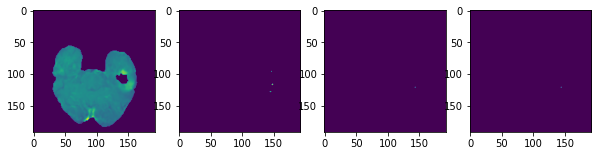

In [ ]:
plt.figure(figsize=[10,10])
patient_number = 0 #@param {type:"slider", min:0, max:162, step:1}
slice_number = 0 #@param {type:"slider", min:0, max:154, step:1}
plt.subplot(141)
plt.imshow(final_image[patient_number][slice_number].reshape(192,192))
plt.subplot(142)
plt.imshow(final_mask[patient_number][slice_number].reshape(192,192))
plt.subplot(143)
plt.imshow(final_predicted_mask[patient_number][slice_number].reshape(192,192))
plt.subplot(144)
plt.imshow(final_predicted_image_tumor[patient_number][slice_number].reshape(192,192))

In [ ]:
from sklearn.metrics import f1_score
score = f1_score(final_predicted_mask.reshape(-1), final_mask.reshape(-1),average='macro')
# print
print(score)

0.9540827901640259


In [ ]:
#import pywt
string='haar'
cA, (cH, cV, cD) = pywt.dwt2(final_predicted_image_tumor[0][10].reshape(192,192), string)
cA, (cH, cV, cD) = pywt.dwt2(cA, string)
cA.shape

(48, 48)

In [ ]:
cH

In [ ]:

def find_feature_value(img,feature,sigma):
  edge = canny(img,sigma=sigma)
  glcm = greycomatrix(edge.astype(np.int),[1],[0],levels=2,symmetric=True,normed=True)
  prop_value = greycoprops(glcm,prop=feature)
  return prop_value

In [ ]:
max_pixel=[]
min_pixel=[]
avg_pixel=[]
std_dev=[]
max_perimeter=[]
contrast=[]
dissimilarity=[]
homogeneity=[]
ASM=[]
energy=[]
correlation=[]
for i in range(0,163):
  print('Finding features of patient '+ str(i))
  max_pixel.append(np.max(final_predicted_image_tumor[i]))
  min_pixel.append(np.min(final_predicted_image_tumor[i]))
  avg_pixel.append(np.average(final_predicted_image_tumor[i]))
  std_dev.append(np.std(final_predicted_image_tumor[i]))
  test_peri=[]
  contrast_slice=[]
  dissimilarity_slice=[]
  homogeneity_slice=[]
  ASM_slice=[]
  energy_slice=[]
  correlation_slice=[]
  for sliced in final_predicted_mask[i]:
    peri =perimeter(sliced.reshape(192,192),neighbourhood=8)
    test_peri.append(peri)
    #print("Peri: " + str(peri))
  max = np.max(np.array(test_peri))
  max_perimeter.append(max)
  for sliced in final_predicted_image_tumor[i]:
    contrast_slice.append(find_feature_value(img=sliced.reshape(192,192),feature='contrast',sigma=2.0))
    homogeneity_slice.append(find_feature_value(img=sliced.reshape(192,192),feature='homogeneity',sigma=2.0))
    dissimilarity_slice.append(find_feature_value(img=sliced.reshape(192,192),feature='dissimilarity',sigma=2.0))
    ASM_slice.append(find_feature_value(img=sliced.reshape(192,192),feature='ASM',sigma=2.0))
    energy_slice.append(find_feature_value(img=sliced.reshape(192,192),feature='energy',sigma=2.0))
    correlation_slice.append(find_feature_value(img=sliced.reshape(192,192),feature='correlation',sigma=2.0))
  contrast.append(np.average(np.array(contrast_slice)))
  homogeneity.append(np.average(np.array(homogeneity_slice)))
  correlation.append(np.average(np.array(correlation_slice)))
  ASM.append(np.average(np.array(ASM_slice)))
  energy.append(np.average(np.array(energy_slice)))
  dissimilarity.append(np.average(np.array(dissimilarity_slice)))
  #print(max)

Finding features of patient 0
Finding features of patient 1
Finding features of patient 2
Finding features of patient 3
Finding features of patient 4
Finding features of patient 5
Finding features of patient 6
Finding features of patient 7
Finding features of patient 8
Finding features of patient 9
Finding features of patient 10
Finding features of patient 11
Finding features of patient 12
Finding features of patient 13
Finding features of patient 14
Finding features of patient 15
Finding features of patient 16
Finding features of patient 17
Finding features of patient 18
Finding features of patient 19
Finding features of patient 20
Finding features of patient 21
Finding features of patient 22
Finding features of patient 23
Finding features of patient 24
Finding features of patient 25
Finding features of patient 26
Finding features of patient 27
Finding features of patient 28
Finding features of patient 29
Finding features of patient 30
Finding features of patient 31
Finding features o

In [ ]:
df = pd.read_csv('drive/My Drive/Necrotic_t1ce_stats_withsurvival.csv')
df = df.drop('Unnamed: 0',axis=1)
df['Max Pixel Value'] = max_pixel
df['Min Pixel Value'] = min_pixel
df['Avg Pixel Value'] = avg_pixel
df['Standard Deviation'] = std_dev
df['Max Perimeter'] = max_perimeter
df['Contrast'] = contrast
df['Homogeneity'] = homogeneity
df['Dissimilarity'] = dissimilarity
df['Energy'] = energy
df['Correlation'] = correlation
df['ASM'] = ASM
df

,Brats17ID,Age,Survival,Predicted_complete_t2_tumor_volume,Actual_complete_t2_tumor_volume,Max Pixel Value,Min Pixel Value,Avg Pixel Value,Standard Deviation,Max Perimeter,Contrast,Homogeneity,Dissimilarity,Energy,Correlation,ASM
0,Brats17_TCIA_167_1,74.907,153,24635.0,26654,3.369565,-0.0,0.026052,0.245434,355.071068,0.005231,0.997385,0.005231,0.992909,0.500384,0.985894
1,Brats17_TCIA_242_1,66.479,147,11182.0,9087,3.894870,-0.0,0.012633,0.175279,320.242641,0.004327,0.997837,0.004327,0.994142,0.463929,0.988339
2,Brats17_TCIA_319_1,64.860,254,5124.0,11694,3.377796,-0.0,0.007580,0.135319,158.071068,0.002693,0.998654,0.002693,0.996323,0.632627,0.992672
3,Brats17_TCIA_469_1,63.899,519,47296.0,28927,2.786596,-0.0,0.028456,0.185408,501.106602,0.009628,0.995186,0.009628,0.986634,0.551270,0.973547
4,Brats17_TCIA_218_1,57.345,346,2907.0,3274,3.734844,-0.0,0.004256,0.096303,89.207107,0.000933,0.999534,0.000933,0.998596,0.645129,0.997194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Brats17_CBICA_ABB_1,68.493,465,1922.0,3624,4.341398,-0.0,0.003380,0.097519,114.621320,0.001160,0.999420,0.001160,0.998390,0.702502,0.996786
159,Brats17_CBICA_AAP_1,39.068,788,8949.0,10902,3.679187,-0.0,0.008928,0.128527,137.621320,0.002931,0.998534,0.002931,0.996053,0.509851,0.992127
160,Brats17_CBICA_AAL_1,54.301,464,606.0,733,4.022229,-0.0,0.002301,0.078196,42.000000,0.000576,0.999712,0.000576,0.999146,0.635142,0.998293
161,Brats17_CBICA_AAG_1,52.263,616,9674.0,9160,2.983400,-0.0,0.007051,0.088342,107.414214,0.003397,0.998301,0.003397,0.995746,0.413486,0.991515


In [ ]:
df.to_csv('Necrotic_t1ce_stats_withsurvival.csv')

In [ ]:
df1 = pd.read_csv('drive/My Drive/survival_data-2017.csv')
df['Age']=df1['Age'].values
df['Survival'] = df1['Survival'].values
df

,Brats17ID,Predicted_complete_t2_tumor_volume,Actual_complete_t2_tumor_volume,Max Pixel Value,Min Pixel Value,Avg Pixel Value,Standard Deviation,Max Perimeter,Contrast,Homogeneity,Dissimilarity,Energy,Correlation,ASM,Age,Survival
0,Brats17_TCIA_167_1,166166.0,163612,5.185662,-0.412493,0.165075,0.709962,439.414214,0.012513,0.993743,0.012513,0.984037,0.403931,0.968422,74.907,153
1,Brats17_TCIA_242_1,149734.0,156606,5.906012,-0.000000,0.160548,0.697488,397.414214,0.012181,0.993910,0.012181,0.983972,0.400764,0.968281,66.479,147
2,Brats17_TCIA_319_1,41166.0,43881,6.767469,-0.000000,0.066216,0.464019,203.207107,0.005315,0.997343,0.005315,0.993098,0.466600,0.986260,64.860,254
3,Brats17_TCIA_469_1,176450.0,204242,4.627936,-0.000000,0.197897,0.795683,351.207107,0.011597,0.994201,0.011597,0.984827,0.417381,0.969960,63.899,519
4,Brats17_TCIA_218_1,82570.0,82921,7.155013,-0.000000,0.164034,0.836476,245.207107,0.007867,0.996066,0.007867,0.989415,0.385866,0.978963,57.345,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Brats17_CBICA_ABB_1,15461.0,21963,4.114760,-0.191152,0.018927,0.214408,144.000000,0.002557,0.998722,0.002557,0.996425,0.495511,0.992867,68.493,465
159,Brats17_CBICA_AAP_1,102224.0,103496,6.150978,-0.000000,0.157040,0.786456,436.000000,0.009213,0.995394,0.009213,0.988043,0.410468,0.976264,39.068,788
160,Brats17_CBICA_AAL_1,26349.0,29807,4.111916,-0.000000,0.036501,0.312464,245.207107,0.004497,0.997751,0.004497,0.994272,0.426342,0.988586,54.301,464
161,Brats17_CBICA_AAG_1,63071.0,67008,6.163480,-0.000000,0.122642,0.698659,241.207107,0.007114,0.996443,0.007114,0.990591,0.408670,0.981289,52.263,616


In [ ]:
df1

,Brats17ID,Age,Survival
0,Brats17_TCIA_167_1,74.907,153
1,Brats17_TCIA_242_1,66.479,147
2,Brats17_TCIA_319_1,64.860,254
3,Brats17_TCIA_469_1,63.899,519
4,Brats17_TCIA_218_1,57.345,346
...,...,...,...
158,Brats17_CBICA_ABB_1,68.493,465
159,Brats17_CBICA_AAP_1,39.068,788
160,Brats17_CBICA_AAL_1,54.301,464
161,Brats17_CBICA_AAG_1,52.263,616


In [ ]:
correlation

[0.4039311034235669,
 0.4007641301917474,
 0.4666004328787915,
 0.41738097097990023,
 0.38586571183883034,
 0.39793416658036734,
 0.5037883015063636,
 0.4308658816777774,
 0.4115160677900331,
 0.4171242089225917,
 0.36945224942293925,
 0.3603964834058169,
 0.38913633018754545,
 0.3754335345344881,
 0.42791467555124435,
 0.42355730989443086,
 0.4658102401198059,
 0.3937552662720429,
 0.390484374193099,
 0.3946942964341716,
 0.45767042749282555,
 0.5041854097314825,
 0.3927282358828061,
 0.491232824314543,
 0.401630195612092,
 0.39279245368913696,
 0.5222071766675657,
 0.3843921915449025,
 0.4434118602383606,
 0.47330590227074837,
 0.40330948726059196,
 0.6158640294713705,
 0.40038145666366576,
 0.3899552191793928,
 0.3847130469462209,
 0.3969534399062189,
 0.4691739989286007,
 0.5591679850431395,
 0.4022826247019672,
 0.42470734385525655,
 0.38395132847576935,
 0.37578866062146826,
 0.4564606896905216,
 0.38070274315743674,
 0.4513033744318055,
 0.4572136526307983,
 0.5065714494703428,


In [ ]:
scaling_image=final_image[0][10].reshape(192,192)
"""scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(scaling_image)
scaled_image=scaler.transform(scaling_image)"""
scaled_image=scaling_image/np.max(scaling_image)

In [ ]:
entr_img = entropy(scaled_image, disk(30))

/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


In [ ]:
plt.figure(figsize=[10,10])
plt.subplot(131)
plt.imshow(scaling_image)
plt.subplot(132)
plt.imshow(scaled_image)
plt.subplot(133)
plt.imshow(entr_img)

NameError: ignored

In [ ]:
np.sum(entr_img)

10842.741357423216

In [ ]:

image_to_edge = final_predicted_image_tumor[1].reshape(-1,192,192)
tst_img = canny(image_to_edge,sigma=1.0)
plt.subplot(121)
plt.imshow(image_to_edge[20],cmap='gray')
plt.subplot(122)
plt.imshow(tst_img,cmap='gray')

ValueError: ignored

In [ ]:

patch_size=16
image_for_glcm = tst_img.astype(np.int)
out_img=np.zeros((192-patch_size+1,192-patch_size+1))
for i in range(192-patch_size+1):
  for j in range(192-patch_size+1):
    patch = image_for_glcm[i:i+patch_size,j:j+patch_size].copy()
    glcm = greycomatrix(patch,[1],[0],levels=2,symmetric=True,normed=True)
    output= greycoprops(glcm,prop='homogeneity')
    out_img[i][j]=output

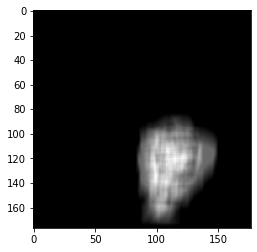

In [ ]:
plt.imshow(-out_img,cmap='gray')

In [ ]:
greycoprops(greycomatrix(tst_img.astype(np.int),[1],[0],levels=2,symmetric=True,normed=True),prop='contrast')

array([[0.01783377]])

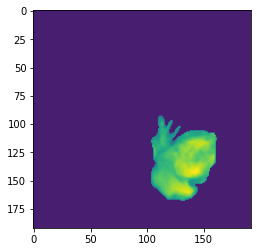

In [ ]:
plt.imshow((final_image*final_predicted_mask)[0][50].reshape(192,192))

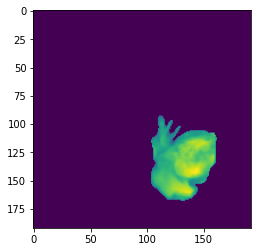

In [ ]:
plt.imshow(np.abs(final_predicted_image_tumor[0][50].reshape(192,192)))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.87044004, 2.27142433, 2.70323303, 2.9139383 , 2.84186432,
        2.28653696, 0.        , 0.        , 0.        , 2.2245018 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.76753139, 2.19934609, 2.64655697, 2.7698475 , 2.68749014,
        2.25556367, 1.62832163, 0.        , 1.84406802, 2.46593107],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 2.12727006, 2.5744571 , 2.70801807, 2.62051744,
        2.25543262, 1.76700423, 1.76692276, 2.32709264, 2.6250906 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 2.12717044, 2.50235944, 2